# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

This notebook was generated with the assistance of AI (ChatGPT, June 2024). Please use caution when interpreting the code or any derived results: always cross-verify outputs and consult primary resources as needed!

---

## Overview of the Dandiset

This notebook introduces [Dandiset 001195](https://dandiarchive.org/dandiset/001195/0.250408.1733), which provides a unique resource for exploring how distinct dopamine projections from the dorsal raphe nucleus (DRN) in mouse brain modulate aspects of social behavior and loneliness-like states. The dataset includes ex vivo patch-clamp (intracellular electrophysiology) recordings from mouse brain slices, richly annotated with experimental, anatomical, and genetic metadata.

**Key features:**
- Model organism: *Mus musculus* (house mouse)
- Techniques: Intracellular patch-clamp electrophysiology
- Data organization: Neurodata Without Borders (NWB) format
- Metadata: Includes brain region (e.g., CeA, BNST, BLP), viral manipulation, subject/genotype, protocol descriptions, etc.

---

## What This Notebook Covers

- Introduction to the structure and organization of Dandiset 001195
- How to access and list NWB files using the DANDI API
- Detailed exploration of a representative NWB file, including:
  - Metadata extraction
  - Sweep/protocol inventory
  - Visualization of paired stimulus and response traces
- Tips to enable broad exploration and reanalysis of these data

---

## Required Packages

This notebook assumes you already have the following packages installed:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `pandas`
- `numpy`

---

## Load & List NWB Files in the Dandiset

Start by using the DANDI API to connect to the Dandiset and list available NWB files. This will help you get a sense of their organization and naming conventions.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Connect to the Dandiset (using the version as seen on the website)
dandiset_id = "001195"
dandiset_version = "0.250408.1733"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 20 NWB files to show file structure and naming
assets = dandiset.get_assets_by_glob("*.nwb")

print("First 20 NWB files in Dandiset 001195:\n")
for asset in islice(assets, 20):
    print(f"- {asset.path} ({asset.size / 1e6:.2f} MB)")

First 20 NWB files in Dandiset 001195:

- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (37.68 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (39.65 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (13.58 MB)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (42.28 MB)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (84.23 MB)
- sub-235/sub-235_ses-20200921T150553_slice-slice-1_cell-C5_icephys.nwb (18.73 MB)
- sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb (309.75 MB)
- sub-235/sub-235_ses-20200921T164032_slice-slice-2_cell-C8_icephys.nwb (20.85 MB)
- sub-235/sub-235_ses-20200921T134852_slice-slice-1_cell-C2_icephys.nwb (259.12 MB)
- sub-235/sub-235_ses-20200921T172736_slice-slice-2_cell-C10_icephys.nwb (26.71 MB)
- sub-235/sub-235_ses-20200921T143210_slice-slice-1_cell-C4_icephys.nwb (246.33 MB)
- sub-235/sub-235_ses-20200921T151331_slice-slice-1

**Notes:**
- Files are organized by subject, then session, then slice/cell.
- Most files are labeled as `icephys` NWB files, indicating intracellular electrophysiology.

---

## Exploring a Representative NWB File

We'll focus on one file as an example to learn how to:
- Extract experiment and subject metadata
- Inventory stimulus protocols and sweeps
- Visualize response and stimulus time series for selected sweeps

For this demo, we'll use the following file:
```
sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
```
We'll stream the file directly using `remfile` rather than download the entire file.

In [2]:
import pynwb
import h5py
import remfile

# Path to a representative NWB file
nwb_path = 'sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb'

# Get the remote file URL via the DANDI API
asset = next(dandiset.get_assets_by_glob(nwb_path))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

### Extract Key Metadata

Let's pull out the experiment/subject/cell metadata to understand biological and experimental context.

In [3]:
subject = nwb.subject
lab_md = nwb.lab_meta_data['DandiIcephysMetadata']

meta = {
    'Subject ID': getattr(subject, 'subject_id', ''),
    'Strain': getattr(subject, 'strain', ''),
    'Genotype': getattr(subject, 'genotype', ''),
    'Sex': getattr(subject, 'sex', ''),
    'Species': getattr(subject, 'species', ''),
    'Description': getattr(subject, 'description', ''),
    'Experimenter': nwb.experimenter[0] if nwb.experimenter else '',
    'Lab': getattr(nwb, 'lab', ''),
    'Institution': getattr(nwb, 'institution', ''),
    'Cell ID': getattr(lab_md, 'cell_id', ''),
    'Slice ID': getattr(lab_md, 'slice_id', ''),
    'Targeted Layer/Region': getattr(lab_md, 'targeted_layer', ''),
    'Inferred Layer/Region': getattr(lab_md, 'inferred_layer', ''),
    'Viral Injection': getattr(subject, 'description', ''),
    'Date of Birth': str(getattr(subject, 'date_of_birth', '')),
    'Session Date': str(nwb.session_start_time),
}

print("Experiment/Cell Metadata Summary:\n")
for k, v in meta.items():
    print(f"{k}: {v}")

Experiment/Cell Metadata Summary:

Subject ID: 23
Strain: DAT::Cre
Genotype: heterozygote
Sex: F
Species: Mus musculus
Description: AAV5-DIO-ChR2-eYFP into DRN
Experimenter: Matthews, Gillian
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology
Cell ID: C1
Slice ID: slice 1
Targeted Layer/Region: CeA
Inferred Layer/Region: CeA
Viral Injection: AAV5-DIO-ChR2-eYFP into DRN
Date of Birth: 2014-05-26 00:00:00-07:00
Session Date: 2015-03-24 13:41:14-07:00


---
### Inventory of Sweeps/Protocols

Each file contains many sweeps (recording episodes), each with rich protocol metadata.
We'll summarize the available sweeps, their timing, and protocol.

In [4]:
import pandas as pd

# List all acquisition keys and collect info for CurrentClamp/VoltageClamp sweeps
acq_keys = list(nwb.acquisition.keys())
sweeps = []
for key in acq_keys:
    o = nwb.acquisition[key]
    cls = o.__class__.__name__
    if cls in ('CurrentClampSeries', 'VoltageClampSeries'):
        sweeps.append({
            'name': key,
            'type': cls,
            'starting_time': o.starting_time,
            'rate': o.rate,
            'unit': o.unit,
            'description': o.description,
            'duration_s': (o.data.shape[0] / o.rate) if hasattr(o, 'data') and hasattr(o, 'rate') else None
        })

sweep_df = pd.DataFrame(sweeps)
print(f"Number of sweeps: {len(sweep_df)}\n")
print("Sweep info table (first 12 shown):")
print(sweep_df.head(12).to_string(index=False))

Number of sweeps: 86

Sweep info table (first 12 shown):
                          name               type  starting_time    rate  unit                                                                   description  duration_s
current_clamp-response-01-ch-0 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-01-ch-1 CurrentClampSeries            0.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-0 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-02-ch-1 CurrentClampSeries            1.0 10000.0 volts Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA         0.3
current_clamp-response-03-ch-0 CurrentClampSeries            2.0 10000.0 volts Response to: episod

---
### What Kinds of Stimulus Protocols?

Let's look at the diversity of stimulation paradigms used in this session.

In [5]:
stim_keys = list(nwb.stimulus.keys())
stim_desc = []
for key in stim_keys:
    stim = nwb.stimulus[key]
    stim_desc.append((key, stim.description.strip()))

# Reduce to unique descriptions
unique_proto = sorted(set(desc for k, desc in stim_desc))

print(f"Number of unique stimulus protocol descriptions: {len(unique_proto)}\n")
print("Unique stimulus protocols detected:")
for desc in unique_proto:
    print("-", desc)

print("\nStimulus key/description (first 8):")
for row in stim_desc[:8]:
    print(row)

Number of unique stimulus protocol descriptions: 5

Unique stimulus protocols detected:
- Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @ 0mV
- Stim type: episodic stimulation, 1 laser pulse, 5ms width, every 30s; @-70mV
- Stim type: episodic stimulation, 10* 1Hz laser pulses, 5ms width, every 60s
- Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
- Stim type: episodic stimulation, 8*30Hz laser pulses, 5ms width, every 30s

Stimulus key/description (first 8):
('stimulus-01-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-01-ch-1', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-02-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-02-ch-1', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA')
('stimulus-03-ch-0', 'Stim type: episodic stimulation, 1s steps, 20pA increments, -12

---
## Visualizing Sweep Responses and Stimuli

Here we'll extract and plot paired membrane voltage responses and current stimuli for a few example sweeps and both available channels. This provides an entry point for reanalysis.

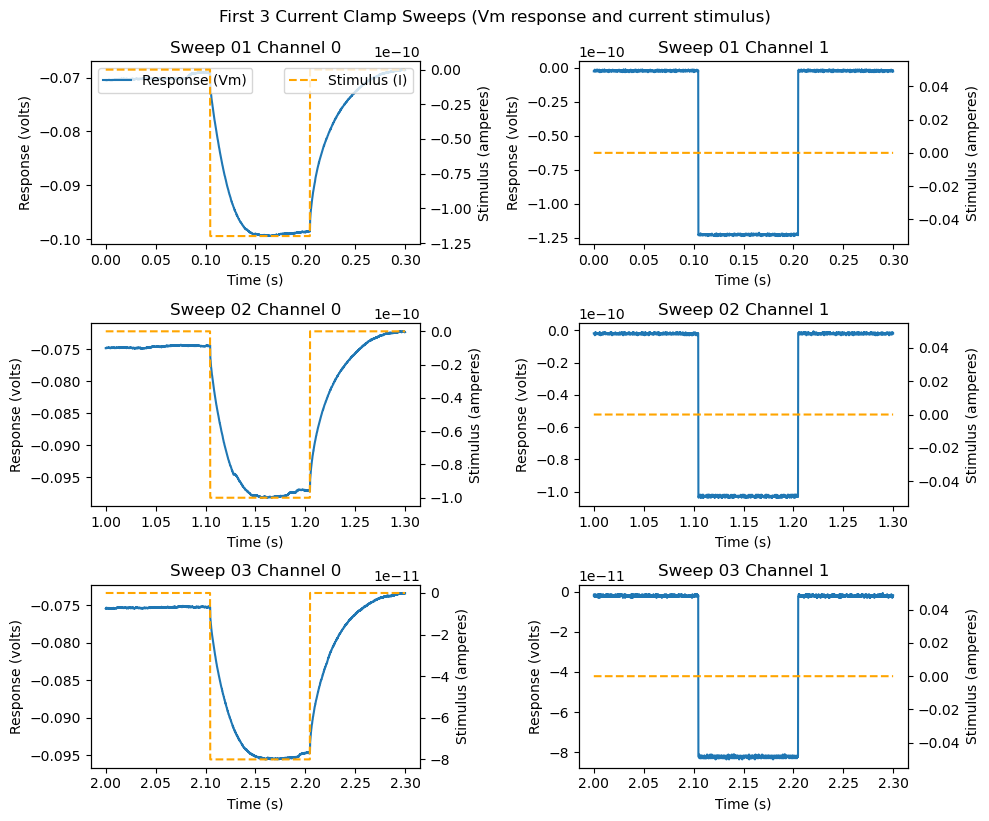

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Helper to get response/stimulus for sweep n, channel ch
def get_ccs_and_stim(n, ch):
    resp_key = f"current_clamp-response-{n:02d}-ch-{ch}"
    stim_key = f"stimulus-{n:02d}-ch-{ch}"
    resp = nwb.acquisition[resp_key]
    stim = nwb.stimulus[stim_key]
    t = np.arange(resp.data.shape[0]) / resp.rate + resp.starting_time
    return t, resp.data[:] * resp.conversion, stim.data[:] * stim.conversion, stim.unit, resp.unit

# Plot first 3 sweeps, channels 0 and 1
plt.figure(figsize=(10, 8))
for i, n in enumerate([1, 2, 3]):
    for ch in [0, 1]:
        t, resp_v, stim_i, stim_unit, resp_unit = get_ccs_and_stim(n, ch)
        ax = plt.subplot(3, 2, 2 * (n - 1) + ch + 1)
        ax.plot(t, resp_v, label='Response (Vm)')
        ax2 = ax.twinx()
        ax2.plot(t, stim_i, color='orange', linestyle='--', label='Stimulus (I)')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Response ({resp_unit})')
        ax2.set_ylabel(f'Stimulus ({stim_unit})')
        ax.set_title(f'Sweep {n:02d} Channel {ch}')
        if n == 1 and ch == 0:
            ax.legend(loc='upper left')
            ax2.legend(loc='upper right')
plt.tight_layout()
plt.suptitle('First 3 Current Clamp Sweeps (Vm response and current stimulus)', y=1.02)
plt.show()

---
## Scaling Up: Working with Larger Sets of NWB Files

You can extend the above approach to list, filter, and analyze many files at once. Below is a template to get you started. (This is not run here to avoid excessive resource use.)

```python
from dandi.dandiapi import DandiAPIClient
from itertools import islice

client = DandiAPIClient()
dandiset = client.get_dandiset('001195', '0.250408.1733')
assets = dandiset.get_assets_by_glob('*.nwb')

for asset in islice(assets, 100):  # Adjust as appropriate
    nwb_path = asset.path
    # Use remfile and pynwb as shown above to load, check metadata or protocol, etc.
    # Example: extract targeted region, protocol type, etc.
```

---

# Final Notes and Next Steps

- **This Dandiset provides highly structured intracellular electrophysiology data with detailed protocol and metadata annotations.**
- **You can filter or group files/sweeps by animal, region, genotype, or stimulation paradigm for meta-analysis, discovery, or reproducibility.**
- **For QC or data exploration, always plot sweeps and verify protocol context using the descriptions and metadata.**
- **Look for new modalities or experiment types by scanning filenames as shown above; adapt the workflow as needed.**

For interactive visual exploration, try Neurosift:  
[Explore a file](https://neurosift.app/nwb?dandisetId=001195&dandisetVersion=0.250408.1733&path=sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb)

---

**This notebook was AI-generated. Please check results for accuracy and suitability for your research context!**